# Import Libraries

In [2]:
import warnings

# Turn off all user warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Reset warnings filter to its default state (if needed) after your code block
# warnings.filterwarnings("default", category=UserWarning)

In [3]:
#sonia's machine
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2023-11-15 15:32:29.616000: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 15:32:29.616030: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 15:32:29.616064: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 15:32:29.622235: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


2023-11-15 15:32:33.003637: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 15:32:33.003798: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-15 15:32:33.049913: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
import numpy as np
import pandas as pd
import joblib
import os
import time
import pickle

## Check Filepaths

In [5]:
cwd = os.getcwd()
cwd

'/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine'

In [6]:
source = 'final'

In [7]:
output_dir = os.path.join(cwd, f"{source}_output")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [8]:
output_dir

'/media/joeymeyer/970-evo-plus/Sonia/bertproj/combine/final_output'

In [9]:
proj_path = '/media/joeymeyer/970-evo-plus/Sonia/bertproj'

In [43]:
### MANUAL CHECK HERE

folders = ['bertproj/ultrachat/ultrachat_1_output', 'bertproj/ultrachat/ultrachat_rest_output', 
           'bertproj/dolly/dolly_output', 'reddit/reddit_output/most_recent']

In [44]:
paths = [os.path.join(proj_path, folder) for folder in folders]

In [45]:
for directory_path in paths:
 # Check if the directory exists
    if os.path.exists(directory_path) and os.path.isdir(directory_path):
        print(f"The directory '{directory_path}' exists.")
    else:
        print(f"The directory '{directory_path}' does not exist.")

The directory '/media/joeymeyer/970-evo-plus/Sonia/bertproj/bertproj/ultrachat/ultrachat_1_output' exists.
The directory '/media/joeymeyer/970-evo-plus/Sonia/bertproj/bertproj/ultrachat/ultrachat_rest_output' exists.
The directory '/media/joeymeyer/970-evo-plus/Sonia/bertproj/bertproj/dolly/dolly_output' exists.
The directory '/media/joeymeyer/970-evo-plus/Sonia/bertproj/reddit/reddit_output/most_recent' exists.


In [46]:
files_dict = {}

for directory_path in paths:
    for filename in os.listdir(directory_path):
        if filename.endswith("travel_df.csv") or filename.endswith(".pkl") and 'model' not in filename:
            file_path = os.path.join(directory_path, filename)
            # Use the filename as the key and the file_path as the value in the dictionary
            files_dict[filename] = file_path

files_dict.keys()

dict_keys(['topic_results_1.pkl', 'topic_results_2.pkl', 'topic_results_3.pkl', 'ultrachat1_travel_df.csv', 'ultrachat_rest_travel_df.csv', 'ultrachat_topic_results.pkl', 'dolly_topic_results.pkl', 'dolly_travel_df.csv', 'final_topic_results.pkl', 'reddit_travel_df.csv'])

## Load Data

In [47]:
data_dict = {}
bertopic_viz_dict = {}
# nrows_to_read = 100

for key, value in files_dict.items():
    if key.endswith('.pkl'):
        bertopic_viz_dict[key] = joblib.load(value)
    elif key.endswith('.csv'):
        data_dict[key] = pd.read_csv(value) #nrows=nrows_to_read
        print(key, data_dict[key].columns)

ultrachat1_travel_df.csv Index(['data', 'combined', 'cause_clean', 'bert_summary', 'topic_assignments',
       'bert_keywords'],
      dtype='object')
ultrachat_rest_travel_df.csv Index(['source', 'filename', 'data', 'combined', 'cause_clean', 'bert_summary',
       'bert_topic', 'topic_assignment'],
      dtype='object')
dolly_travel_df.csv Index(['source', 'combined', 'category', 'response', 'context', 'instruction',
       'cause_clean', 'bert_summary', 'bert_topic', 'topic_assignments'],
      dtype='object')
reddit_travel_df.csv Index(['source', 'filename', 'title', 'selftext', 'creation_date', 'id', 'url',
       'upvote_ratio', 'ups', 'downs', 'score', 'link_flair_css_class',
       'comments', 'combined', 'cause_clean', 'bert_summary', 'bert_topic',
       'topic_assignment'],
      dtype='object')


## Reorder Columns

In [48]:
column_order = ['source', 'filename', 'data', 'combined', 'cause_clean', 'bert_summary']

### ultrachat 1

In [49]:
data_dict['ultrachat1_travel_df.csv'].insert(0, 'source', 'ultrachat')
data_dict['ultrachat1_travel_df.csv'].insert(1, 'filename', 'ultrachat_1')
data_dict['ultrachat1_travel_df.csv'] = data_dict['ultrachat1_travel_df.csv'][column_order]
data_dict['ultrachat1_travel_df.csv'].head()

,source,filename,data,combined,cause_clean,bert_summary
0,ultrachat,ultrachat_1,['Which hiking trail would you recommend for b...,Which hiking trail would you recommend for beg...,which hike trail would you recommend for begin...,any to the that and should national always can...
1,ultrachat,ultrachat_1,['What are some popular family-friendly activi...,What are some popular family-friendly activiti...,what be some popular family friendly activity ...,s coaster valley have associate have ride coun...
2,ultrachat,ultrachat_1,['Can you suggest any tips for finding cheap y...,Can you suggest any tips for finding cheap yet...,can you suggest any tip for find cheap yet del...,world trail various for medium offer cheap of ...
3,ultrachat,ultrachat_1,['Can you recommend any accommodations for hik...,Can you recommend any accommodations for hiker...,can you recommend any accommodation for hiker ...,region tour like for a and suit guide km desig...
4,ultrachat,ultrachat_1,['How long does it take for visitors to reach ...,How long does it take for visitors to reach th...,how long do it take for visitor to reach the h...,that observatory 5 to of peak southwestern ali...


### ultrachat rest

In [50]:
data_dict['ultrachat_rest_travel_df.csv'] = data_dict['ultrachat_rest_travel_df.csv'][column_order]
data_dict['ultrachat_rest_travel_df.csv'].head()

,source,filename,data,combined,cause_clean,bert_summary
0,ultrachat,train_1.jsonl,['What are some unusual forms of public transp...,What are some unusual forms of public transpor...,what be some unusual form of public transporta...,comfort modern however transportation the prop...
1,ultrachat,train_1.jsonl,['Can you recommend an outdoor excursion from ...,Can you recommend an outdoor excursion from Le...,can you recommend an outdoor excursion from le...,could take landscape historic your time s deli...
2,ultrachat,train_1.jsonl,['Can you give me any information on local art...,Can you give me any information on local art g...,can you give me any information on local art g...,it spot necessarily outdoor point wolfsburg ju...
3,ultrachat,train_1.jsonl,['Are there any historical or cultural landmar...,Are there any historical or cultural landmarks...,be there any historical or cultural landmark i...,this for aircraft nearby offer around and expl...
4,ultrachat,train_1.jsonl,"[""Is there a particular cultural tour or walki...",Is there a particular cultural tour or walking...,be there a particular cultural tour or walk tr...,can try by square interested 3 often havana an...


### dolly

In [51]:
# Define a custom function to create a dictionary from the specified columns
def create_dict(row):
    return {
        'category': row['category'],
        'response': row['response'],
        'context': row['context'],
        'instruction': row['instruction']
    }

In [52]:
data_dict['dolly_travel_df.csv'].insert(1, 'filename', 'dolly')
data_dict['dolly_travel_df.csv']['data'] = data_dict['dolly_travel_df.csv'].apply(create_dict, axis=1)
data_dict['dolly_travel_df.csv'] = data_dict['dolly_travel_df.csv'][column_order]
data_dict['dolly_travel_df.csv'].head()

,source,filename,data,combined,cause_clean,bert_summary
0,dolly,dolly,"{'category': 'summarization', 'response': 'Min...",Provide me a list of the different types of ha...,provide me a list of the different type of har...,narrow of same cave impact also which for harn...
1,dolly,dolly,"{'category': 'general_qa', 'response': 'Enrich...",What is enriched air and why would divers dive...,what be enrich air and why would diver dive wi...,last for primary min air and to use of bottom ...
2,dolly,dolly,"{'category': 'open_qa', 'response': 'A kite is...",What is a kite? A kite is a toy that can be b...,what be a kite a kite be a toy that can be be ...,what be a kite a kite be a toy that can be be ...
3,dolly,dolly,"{'category': 'general_qa', 'response': 'Mt. Wh...",What is the tallest mountain in the continenta...,what be the tall mountain in the continental u...,what be the tall mountain in the continental u...
4,dolly,dolly,"{'category': 'creative_writing', 'response': '...",Plan for a three day road trip for May long we...,plan for a three day road trip for may long we...,road time village city 4 go montreal mount may...


### reddit

In [53]:
column_order

['source', 'filename', 'data', 'combined', 'cause_clean', 'bert_summary']

In [58]:
# Define a custom function to create a dictionary from the specified columns
def create_dict(row):
    return {
        'title': row['title'],
        'selftext': row['selftext'],
        'creation_date': row['creation_date'],
        'id': row['id'],
        'url': row['url'],
        'upvote_ratio': row['upvote_ratio'],
        'ups': row['ups'],
        'downs': row['downs'],
        'score': row['score'],
        'link_flair_css_class': row['link_flair_css_class'],
        'comments': row['comments']
    }

In [59]:
data_dict['reddit_travel_df.csv']['data'] = data_dict['reddit_travel_df.csv'].apply(create_dict, axis=1)
data_dict['reddit_travel_df.csv'] = data_dict['reddit_travel_df.csv'][column_order]
data_dict['reddit_travel_df.csv'].head()

,source,filename,data,combined,cause_clean,bert_summary
0,reddit,travel_hot_100_2023-11-12,{'title': 'Passport Questions & Issues Megathr...,Passport Questions & Issues Megathread (2023) ...,passport question issue megathread 2023 note o...,day s passport en n for fucking any i check ca...
1,reddit,travel_hot_100_2023-11-12,"{'title': 'U.S. Department of State - ""Worldwi...","U.S. Department of State - ""Worldwide Caution""...",u s department of state worldwide caution u s ...,few in hear go it club american worry be wear ...
2,reddit,travel_hot_100_2023-11-12,{'title': '[Update] Jewelry stolen from luggag...,[Update] Jewelry stolen from luggage First of ...,update jewelry steal from luggage first of all...,protection of a both his can nalthough chatgpt...
3,reddit,travel_hot_100_2023-11-12,{'title': 'Just me or is the US now far and aw...,Just me or is the US now far and away the most...,just me or be the u now far and away the most ...,service uk to each destination low fly or to c...
4,reddit,travel_hot_100_2023-11-12,{'title': 'We need to be more supportive of ea...,We need to be more supportive of each other IR...,we need to be more supportive of each other ir...,read i not someone travel to that bad do gauch...


# Combine df

In [60]:
df = pd.concat(data_dict.values(), axis=0)
df.reset_index(drop=True, inplace=True)
df.shape

(44734, 6)

In [65]:
#check distribution across data sources
value_counts = df['source'].value_counts()
value_counts

source
ultrachat    39941
reddit        4434
dolly          359
Name: count, dtype: int64

In [67]:
travel_conversations = df[df['source'].isin(['dolly', 'ultrachat'])]
joblib.dump(travel_conversations, f'{output_dir}/travel_conversations.pkl')
# df = joblib.load(f'{output_dir}/combined_df.pkl')

['/media/joeymeyer/970-evo-plus/Sonia/bertproj/bertproj/combine/final_output/travel_conversations.pkl']

In [68]:
travel_QA = df[df['source'].isin(['reddit', ])]
joblib.dump(travel_QA, f'{output_dir}/travel_QA.pkl')
# df = joblib.load(f'{output_dir}/combined_df.pkl')

['/media/joeymeyer/970-evo-plus/Sonia/bertproj/bertproj/combine/final_output/travel_QA.pkl']

## Sample for visualization

In [73]:
sample_size = 30000 - 359

In [74]:
travel_conversations_sample = travel_conversations[travel_conversations['source'] == 'ultrachat'].sample(n=sample_size, random_state=42)
travel_conversations_sample = pd.concat([travel_conversations_sample, 
                                         travel_conversations[travel_conversations['source'] == 'dolly']], axis=0)
travel_conversations_sample.reset_index(drop=True, inplace=True)

In [77]:
#check distribution across data sources
value_counts = travel_conversations_sample['source'].value_counts()
value_counts.head(20)

source
ultrachat    29641
dolly          359
Name: count, dtype: int64

In [78]:
travel_conversations_sample.shape

(30000, 6)

In [80]:
travel_conversations_sample = df[df['source'].isin(['dolly', 'ultrachat'])]
joblib.dump(travel_conversations, f'{output_dir}/travel_conversations_sample.pkl')


['/media/joeymeyer/970-evo-plus/Sonia/bertproj/bertproj/combine/final_output/travel_conversations_sample.pkl']

# Data Stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = joblib.load(f'{output_dir}/combined_df.pkl')

In [18]:
df.insert(0, 'type', df['source'].map({'ultrachat': 'conversational', 'reddit': 'Q&A','dolly': 'Q&A'}))

In [20]:
# Custom function to map the 'filename' column based on the condition
def map_filename(filename):
    if 'hot' in filename:
        return 'hot'
    elif 'top' in filename:
        return 'top'
    else:
        return None

In [21]:
df['reddit_type'] = df['filename'].apply(map_filename)

In [23]:
# Custom function to extract the first word before '_'
def extract_first_word(filename):
    if '_' in filename:
        return filename.split('_')[0]
    return filename

# Apply the custom function to create the new column 'first_word'
df['subreddit'] = df.apply(lambda row: extract_first_word(row['filename']) if row['source'] == 'reddit' else None, axis=1)

In [24]:
df

,type,source,filename,data,combined,cause_clean,bert_summary,reddit_type,subreddit
0,conversational,ultrachat,ultrachat_1,['Which hiking trail would you recommend for b...,Which hiking trail would you recommend for beg...,which hike trail would you recommend for begin...,any to the that and should national always can...,None,None
1,conversational,ultrachat,ultrachat_1,['What are some popular family-friendly activi...,What are some popular family-friendly activiti...,what be some popular family friendly activity ...,s coaster valley have associate have ride coun...,None,None
2,conversational,ultrachat,ultrachat_1,['Can you suggest any tips for finding cheap y...,Can you suggest any tips for finding cheap yet...,can you suggest any tip for find cheap yet del...,world trail various for medium offer cheap of ...,None,None
3,conversational,ultrachat,ultrachat_1,['Can you recommend any accommodations for hik...,Can you recommend any accommodations for hiker...,can you recommend any accommodation for hiker ...,region tour like for a and suit guide km desig...,None,None
4,conversational,ultrachat,ultrachat_1,['How long does it take for visitors to reach ...,How long does it take for visitors to reach th...,how long do it take for visitor to reach the h...,that observatory 5 to of peak southwestern ali...,None,None
...,...,...,...,...,...,...,...,...,...
44729,Q&A,reddit,adventures_top_1000_2023-11-12,{'title': 'Adventure To Study The North Pole.'...,Adventure To Study The North Pole. Hello Every...,adventure to study the north pole hello everyo...,to there me be will north welcome this be land...,top,adventures
44730,Q&A,reddit,adventures_top_1000_2023-11-12,{'title': 'Best city and itinerary in Southeas...,Best city and itinerary in Southeast Asia for ...,best city and itinerary in southeast asia for ...,with will from and southeast can that experien...,top,adventures
44731,Q&A,reddit,adventures_top_1000_2023-11-12,"{'title': 'Walkabout ideas?', 'selftext': 'Rec...",Walkabout ideas? Recent life events have left ...,walkabout idea recent life event have leave me...,from ft a my night decide and im in in of the ...,top,adventures
44732,Q&A,reddit,adventures_top_1000_2023-11-12,"{'title': 'Tadjikistan this summer', 'selftext...",Tadjikistan this summer \n\nHi everyone ! \n...,tadjikistan this summer hi everyone some photo...,have of more be photo com my t the hi splendid...,top,adventures


In [26]:
type_counts = df['type'].value_counts()
print(type_counts)
source_counts = df['source'].value_counts()
print(source_counts)
reddit_counts = df['reddit_type'].value_counts()
print(reddit_counts)
subreddit_counts = df['subreddit'].value_counts()
print(subreddit_counts)

type
conversational    39941
Q&A                4793
Name: count, dtype: int64
source
ultrachat    39941
reddit        4434
dolly          359
Name: count, dtype: int64
reddit_type
hot    3393
top    1041
Name: count, dtype: int64
subreddit
awardtravel      100
Iwantout          99
shoestring        98
flights           97
solotravel        95
                ... 
unitedkingdom      2
colombo            1
makkah             1
canada             1
lagos              1
Name: count, Length: 170, dtype: int64


/tmp/ipykernel_1503685/1268427247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


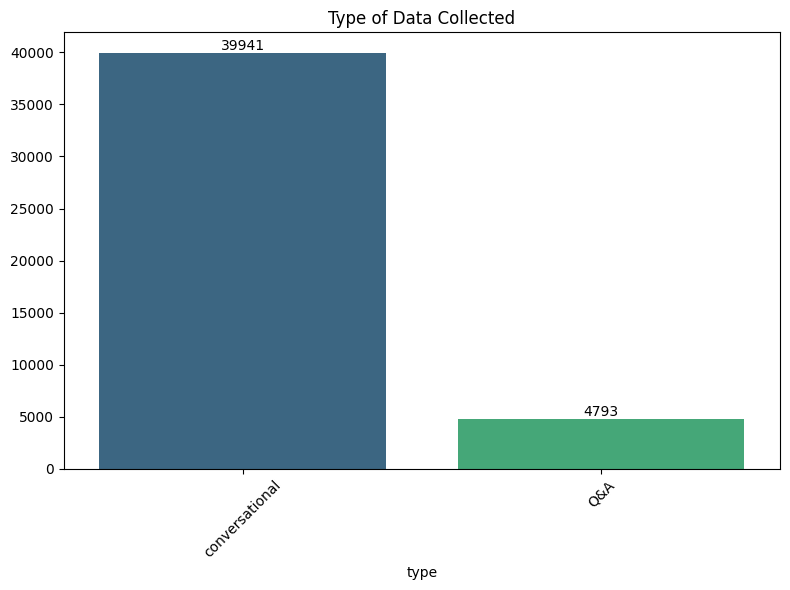

In [39]:
# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
# plt.xlabel('Data Type')
# plt.ylabel('Count')
plt.title('Type of Data Collected')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility

# Add labels to each bar
for i, v in enumerate(type_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(f'{output_dir}/type_counts.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_1503685/3646195724.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')


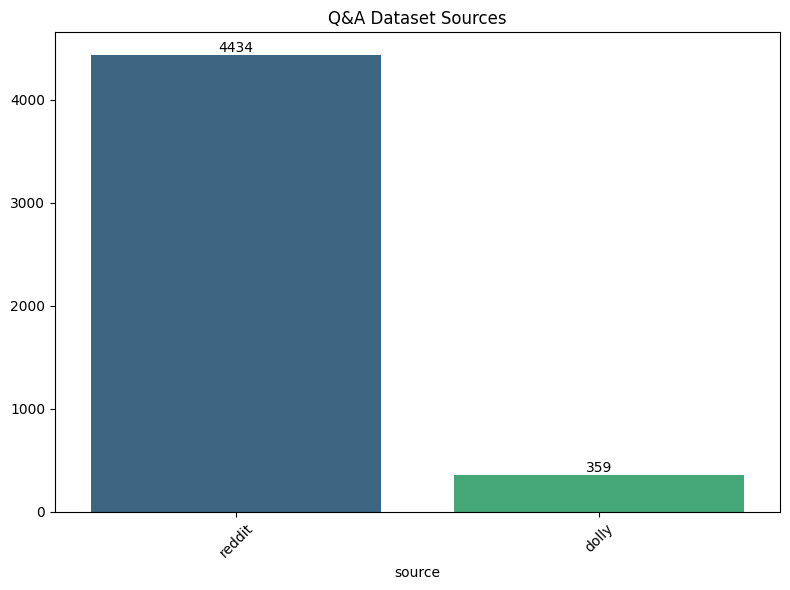

In [40]:
source_counts = source_counts.drop('ultrachat', errors='ignore')

# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
# plt.xlabel('Source')
# plt.ylabel('Count')
plt.title('Q&A Dataset Sources')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility

# Add labels to each bar
for i, v in enumerate(source_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(f'{output_dir}/qa_counts.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_1503685/3462992290.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reddit_counts.index, y=reddit_counts.values, palette='viridis')


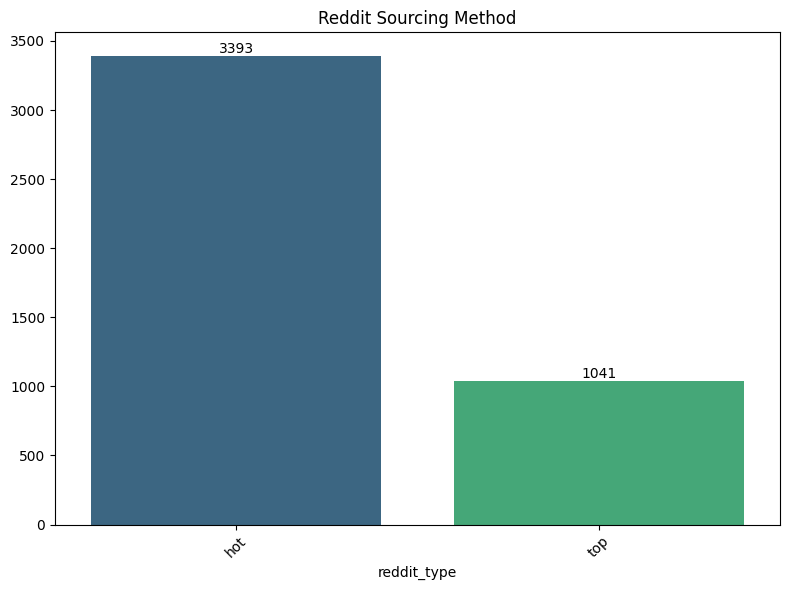

In [41]:
# Create a bar plot for visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=reddit_counts.index, y=reddit_counts.values, palette='viridis')
# plt.xlabel('Source')
# plt.ylabel('Count')
plt.title('Reddit Sourcing Method')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility

# Add labels to each bar
for i, v in enumerate(reddit_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(f'{output_dir}/reddit_counts.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_1503685/2926795187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='viridis')


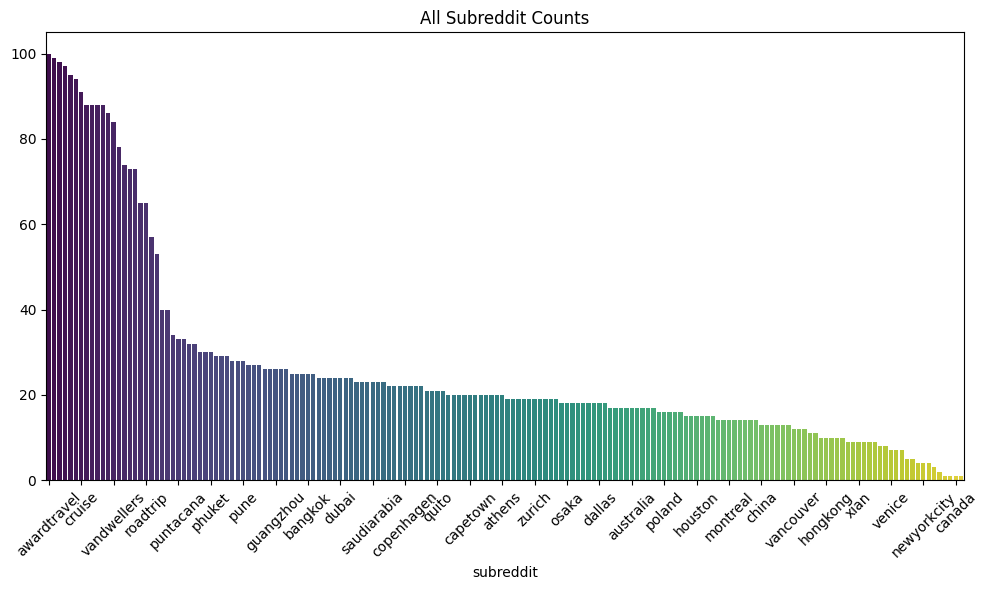

In [60]:
# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=subreddit_counts.index, y=subreddit_counts.values, palette='viridis')
# plt.xlabel('Source')
# plt.ylabel('Count')
plt.title('All Subreddit Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility

# Show every 10th x-axis label
step = 6
plt.xticks(range(0, len(subreddit_counts.index), step), subreddit_counts.index[::step], rotation=45)

plt.tight_layout()
plt.savefig(f'{output_dir}/all_subreddit_counts.png', bbox_inches='tight')
plt.show()

/tmp/ipykernel_1503685/1314386174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_40.index, y=top_40.values, palette='viridis')


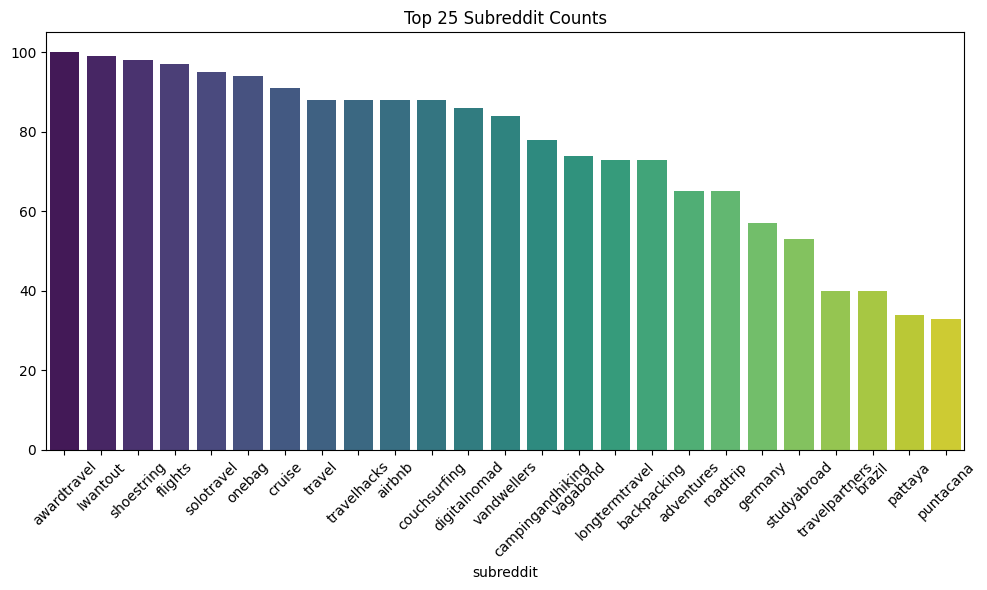

In [59]:
# Get the top 40 elements
top_40 = subreddit_counts.nlargest(25)

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_40.index, y=top_40.values, palette='viridis')
# plt.xlabel('Source')
# plt.ylabel('Count')
plt.title('Top 25 Subreddit Counts')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better visibility

# Show every 10th x-axis label
# step = 8
# plt.xticks(range(0, len(top_40.index), step), subreddit_counts.index[::step], rotation=45)

plt.tight_layout()
plt.savefig(f'{output_dir}/top_25_subreddit_counts.png', bbox_inches='tight')
plt.show()

In [ ]:
### do something with bertopic_viz_dict